# GUIA 1

In [2]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.integrate import quad
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge



# Ejercicio 1

![image.png](enunciados/ej1.png)

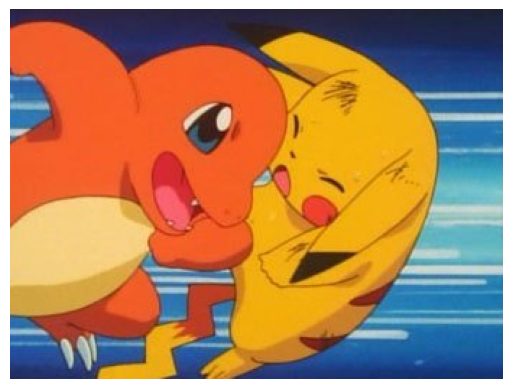

In [3]:
# Cargamos la imagen
imagen = mpimg.imread('recursos/pikachu_vs_charmander.jpeg')
# Mostramos la imagen
plt.imshow(imagen)
plt.axis('off')  # Oculta los ejes
plt.show()

#del imagen

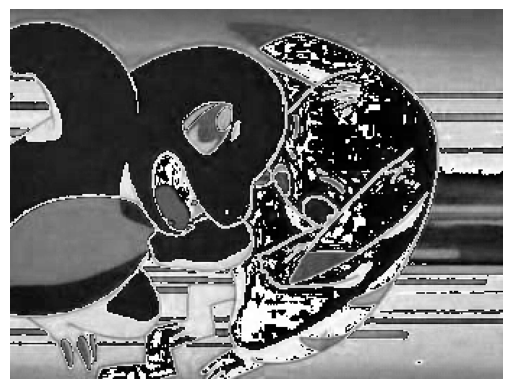

In [10]:
# a)
imagen_r = imagen [:,:,0]
imagen_g = imagen [:,:,1]
imagen_b = imagen [:,:,2]

minimos = np.min([imagen_r,imagen_g,imagen_b], axis=0)
maximos = np.max([imagen_r,imagen_g,imagen_b], axis=0)

imagen_bw1 = ((minimos + maximos)/2).astype(np.uint8)


plt.imshow(imagen_bw1, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.show()

#del imagen_r, imagen_g, imagen_b, minimos, maximos, imagen_bw1

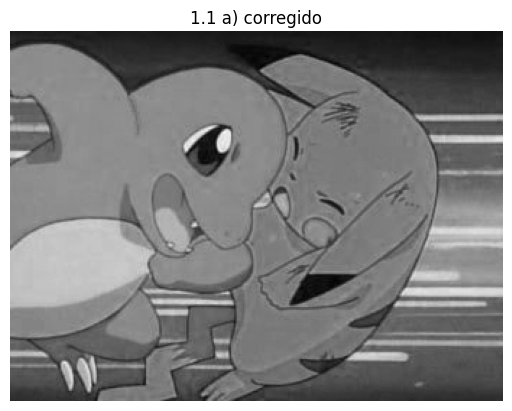

In [11]:
#a) CORREGIDO

# Convertimos la imagen a float para evitar overflow
imagen_float = imagen.astype(float)

minimos = np.min(imagen_float, axis=2)  # Calcula el mínimo a lo largo del eje de los canales
maximos = np.max(imagen_float, axis=2)  # Calcula el máximo a lo largo del eje de los canales

imagen_bw1 = ((minimos + maximos) / 2).astype(np.uint8)

plt.imshow(imagen_bw1, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.title("1.1 a) corregido")
plt.show()

del imagen_float, 

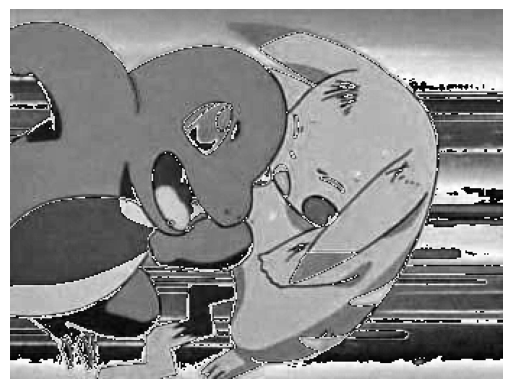

In [12]:
# b)

imagen_bw2 = ((imagen_r + imagen_g + imagen_b) / 3)
plt.imshow(imagen_bw2, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.show()

#del imagen_bw2


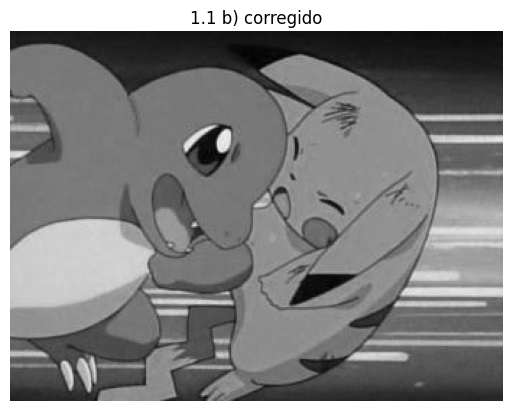

In [13]:
#b) Corregido

imagen_r_float = imagen[:, :, 0].astype(float)
imagen_g_float = imagen[:, :, 1].astype(float)
imagen_b_float = imagen[:, :, 2].astype(float)

imagen_bw2 = ((imagen_r_float + imagen_g_float + imagen_b_float) / 3).astype(np.uint8)
plt.imshow(imagen_bw2, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.title("1.1 b) corregido")
plt.show()

#del imagen_r_float, imagen_g_float, imagen_b_float, imagen_bw2

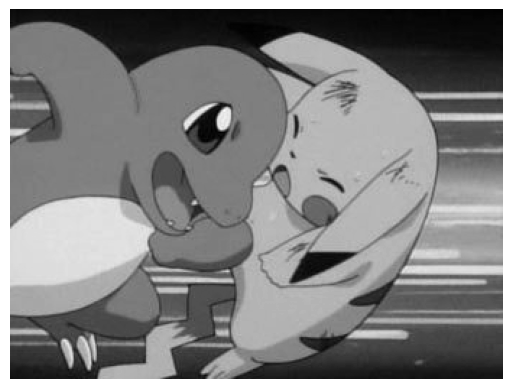

In [135]:
# c)
rgb = [0.3, 0.59, 0.11]
imagen_bw3 = imagen @ rgb
plt.imshow(imagen_bw3, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.show()

#del rgb, imagen_bw3

# Ejercicio 2

![image.png](enunciados/ej2.png)

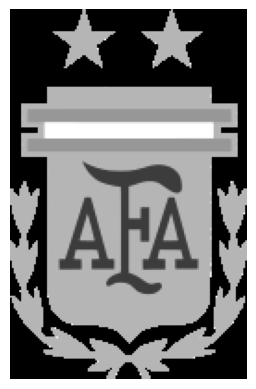

In [136]:
# Cargamos la imagen
imagen_afaLogo = mpimg.imread('recursos/AFALogo.bmp')
# Mostramos la imagen
plt.imshow(imagen_afaLogo, cmap='gray')
plt.axis('off')  # Oculta los ejes
plt.show()

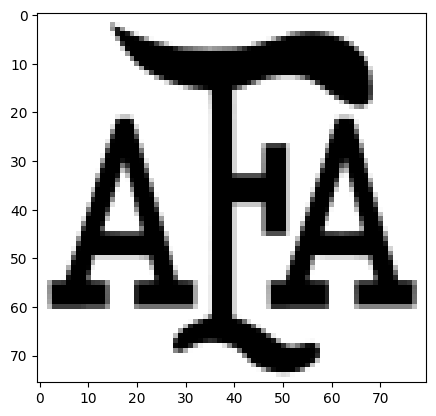

In [137]:
# a)

# A ojo, elijo los valores que recortan las letras.
letras_afaLogo = imagen_afaLogo[80:156, 24:104]
plt.imshow(letras_afaLogo, cmap='gray')


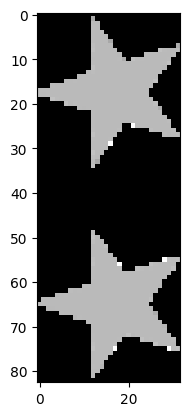

In [138]:
# b)

# Con el metodo .T de numpy traspongo la matriz.
estrellas_afaLogo = imagen_afaLogo[0:32, 22:105].T

plt.imshow(estrellas_afaLogo, cmap='gray')

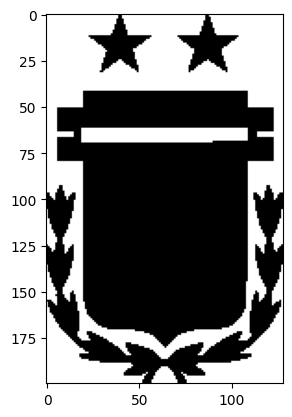

In [139]:
# c) 

# Puedo usar la capacidad de NumPy de indexar matrices en base al 
# cumplimiento de condiciones

# Necesito habilitar la escritura del array.
# magen_afaLogo_c.setflags(write=1)

# Como no funciona, otra forma es copiarlo:
imagen_afaLogo_c = imagen_afaLogo.copy()

# Todos los elementos que cumplan que son 0 (negro) los paso a blanco
imagen_afaLogo_c[imagen_afaLogo_c == 0] = 255

# Todos los elementos que cumplan que son menores que 255 (osea, no blancos)
# los paso a negro
imagen_afaLogo_c[imagen_afaLogo_c < 255] = 0

plt.imshow(imagen_afaLogo_c, cmap='gray')

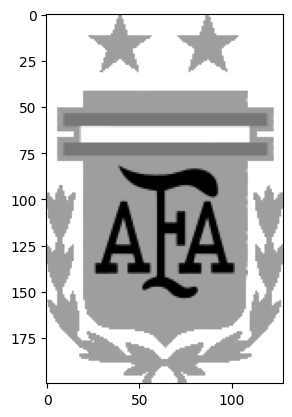

In [144]:
# d)

imagen_afaLogo_d = imagen_afaLogo.copy()

# Todos los elementos que cumplan que son 0 (negro), los hago blancos
imagen_afaLogo_d[imagen_afaLogo_d == 0] = 255

plt.imshow(imagen_afaLogo_d, cmap='gray')

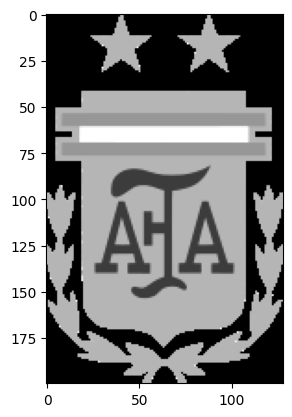

In [141]:
# e)

# Usando la funcion fliplr()
imagen_afaLogo_espejada = np.fliplr(imagen_afaLogo)

# Usando indexacion, selecciono todas las filas, y con el -1
# invierto todas las columnas

imagen_afaLogo_espejada2 = imagen_afaLogo[:, ::-1]

#plt.imshow(imagen_afaLogo_espejada, cmap='gray')
plt.imshow(imagen_afaLogo_espejada2, cmap='gray')

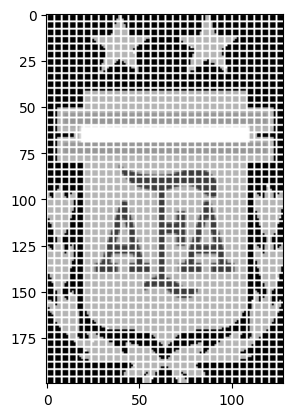

In [142]:
# f) 

imagen_afaLogo_grilla = imagen_afaLogo.copy()

# Con la indexacion [start:stop:step] hago que cada 4 filas
# se cambien toda una fila a blanco, para todas las columnas
imagen_afaLogo_grilla[::4, :] = 255

# Ahora hago que cada 4 columnas se cambie una columna entera a blanco
# para todas las filas
imagen_afaLogo_grilla[:, ::4] = 255


plt.imshow(imagen_afaLogo_grilla, cmap='gray')

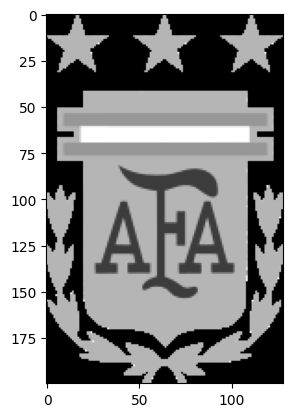

In [143]:
# g)


estrella = imagen_afaLogo[0:32, 23:57]
espacio =  imagen_afaLogo[0:32, 57:70]

# Uso la funcion de numpy para concatenar, con axis = 1 para hacerlo
# sobre el eje horizontal. Armo las 3 estrellas.

estrellas= np.concatenate((estrella, espacio), axis=1)
estrellas= np.concatenate((estrellas, estrella), axis=1)
estrellas= np.concatenate((estrellas, espacio), axis=1)
estrellas= np.concatenate((estrellas, estrella), axis=1)

# Corto la parte del escudo sin las estrellas
imagen_afaLogo_crop = imagen_afaLogo[32::,:]
# Vuelvo a concatenar las 3 estrellas con la parte del escudo sin estrellas
# Esta vez axis = 0 para hacerlo sobre el eje vertical
imagen_afaLogo_tres = np.concatenate((estrellas, imagen_afaLogo_crop), axis = 0)


#plt.imshow(estrella, cmap='gray')
#plt.imshow(espacio, cmap='gray')
#plt.imshow(estrellas, cmap='gray')
#plt.imshow(imagen_afaLogo_crop, cmap='gray')

plt.imshow(imagen_afaLogo_tres, cmap='gray')


# Ejercicio 3

![image.png](enunciados/ej3.png)

### Soporte

- Para $x$: entre $0$ y $1$
- Para $y$: entre $0$ y $1 + x^3$

### Esperanza condicional $E[Y|X = x]$

La calculamos usando la siguiente formula

$E[Y|X = x] = \int_{-\infty}^{\infty} y \cdot p_{Y|X}(y|x) = \frac{\int_{0}^{1+x^3} y \cdot dy}{\int_{0}^{1+x^3} dy} = \frac{1 + 2x^3 + x^6}{2 + 2x^3} = \frac{1 + x^3}{2}$

### Recta de regresion

Es la recta que mejor se ajusta a $E[Y|X = x]$. Tiene la forma $y = \alpha + \beta \cdot x$, con

- $\beta = \frac{Cov(X,Y)}{Var(X)}$
- $\alpha = E[Y] - \beta E[X]$

Calculamos:

$E[X] = \int_{0}^{1} x \cdot p_{X}(x) dx = \int_{0}^{1} x \cdot \frac{4}{5} (1 + x^3) $

Ya que

$p_{X}(x) = \int_{0}^{1+x^3} p_{XY}(x,y) dy = \int_{0}^{1+x^3} \frac{4}{5} dy = \frac{4}{5} (1 + x^3)$

Luego

$E[Y] = \int_{0}^{1} \int_{0}^{1+x^3} y \cdot p_{XY}(x,y) dydx = \int_{0}^{1} \int_{0}^{1+x^3} y \cdot \frac{4}{5} dydx $

Seguimos calculando $Cov(X,Y)$:

$Cov(X,Y) = E[XY] - E[X]E[Y]$

$E[XY] =  \int_{0}^{1} \int_{0}^{1+x^3} x y \cdot \frac{4}{5} dydx $

Luego calvulamos $Var(X)$

$Var(X) = E[X^2] - (E[X])^2 $

Donde $E[X^2]$ vale

$E[X^2] = \int_{0}^{1} x^2 \cdot p_{X}(x) dx = \int_{0}^{1} x^2 \cdot \frac{4}{5} (1 + x^3) $




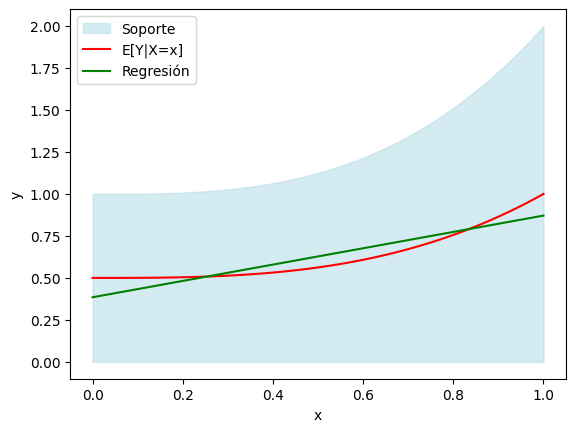

In [3]:
# En codigo:

# Defino vector X
x = np.linspace(0, 1, 100)

# Defino soporte y
y_soporte_max = 1 + x**3
y_soporte_min = 0

# Esperanza condicional
Esp_y_dado_x = (1 + x**3) / 2

# Recta de regresion: para calcular integrales necesito definir las funciones

# Dens marginal de X
def p_X(x):
    return (4/5) * (1 + x**3)

# E[X]
Esp_X, _err1 = quad(lambda x: x * p_X(x), 0, 1)

# E[Y]
def E_y_dado_x(x):
    return (1 + x**3) / 2
Esp_Y, _err2 = quad(lambda x: E_y_dado_x(x) * p_X(x), 0, 1)

# E[X^2]
Esp_X2, _err3 = quad(lambda x: x**2 * p_X(x), 0, 1)

# Var(X)
Var_X = Esp_X2 - (Esp_X)**2

# E[XY]
def E_XY_integral(x):
    return (4/5) * quad(lambda y: x * y, 0, 1 + x**3)[0]

Esp_XY, _err4 = quad(lambda x: E_XY_integral(x), 0, 1)

#Cov(X,Y)
Cov_XY = Esp_XY - Esp_X * Esp_Y

# alfa y beta

beta = Cov_XY / Var_X
alfa = Esp_Y - beta*Esp_X

y_regresion = alfa + beta * x

#Grafico
plt.fill_between(x,y_soporte_min,y_soporte_max, color="lightblue", alpha=0.5, label="Soporte")
plt.plot(x, Esp_y_dado_x, color="red", label="E[Y|X=x]")
plt.plot(x, y_regresion, color="green", label="Regresión")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()





### Correccion

Partiendo de 

$p_{XY}(x,y) = \frac{4}{5}   1  (0<y<1+x^3 , 0<x<1)$

Si utilizamos la factorización  

$p_{XY}(x, y) = p_{Y|X}(y|x) \cdot p_X(x)$

Vemos que necesitamos encontrar dos funciones tal que ambas integren 1, pero que una dependa solo de $x$, y otra dependa de $x$ y de $y$. Es por esto que podemos descomponer

$ p_{XY}(x,y) = \frac{1}{1+x^3} \cdot 1 (0<y<1+x^3) \cdot \frac{4}{5} (1+x^3) \cdot 1(0<x<1)$

De esta forma se desprende que:

$p_{Y|X}(y|x) = \frac{1}{1+x^3} \cdot 1 (0<y<1+x^3)$

$p_X(x) = \frac{4}{5} (1+x^3) \cdot 1(0<x<1)$

Para la esperanza condicional $E[Y|X=x]$ se tiene que

$E[Y|X=x] = \int _{D(Y)} y \cdot p_{Y|X}(y|x) dy = \int _0 ^{1 + x^3} y \cdot \frac{1}{1+x^3}dy = \frac{1}{1+x^3} \cdot  \int _0 ^{1 + x^3} y dy = \frac{1}{1+x^3} \cdot \frac{y^2}{2} |^{1+x^3}_0 $


$E[Y|X=x] = \frac{1}{1+x^3} \cdot \frac{(1+x^3)^{2}}{2} = \frac{1+x^3}{2}$


Luego para la recta de regresión $y = \alpha + \beta \cdot x$

- $\beta = \frac{Cov(X,Y)}{Var(X)}$
- $\alpha = E[Y] - \beta E[X]$


$E[X] = \int _0 ^1 x \cdot p_X(x) dx = \int _0 ^1 x \cdot \frac{4}{5} \cdot (1 + x^3) dx = \frac{4}{5} \cdot (\frac{x^2}{2} + \frac{x^5}{5})|^1 _0 = \frac{4}{5} \cdot (\frac{1}{2} + \frac {1}{5}) = \frac{14}{25} = 0.56$ 


Para $E[Y]$ podemos usar la propiedad de la esperanza condicional $E[Y] = E[E[Y|X]] = E[\frac{1+x^3}{2}]$ y por propiedades de la esperanza se obtiene que 


$E[Y] = \frac{1}{2} (1 + E[X^3])$

Por lo que ahora calculamos $E[X^3]$ de una forma muy parecida a como calculamos $E[X]$, o sea, por definicion

$E[X^3] = \int _0 ^1 x^3 \cdot p_X(x) dx = \int _0 ^1 x^3 \cdot \frac{4}{5} \cdot (1 + x^3) dx = \frac{4}{5} \cdot (\frac{x^4}{4} + \frac{x^7}{7})|^1 _0 = \frac{4}{5} \cdot (\frac{1}{4} + \frac {1}{7}) = \frac{11}{35} $


Entonces, 

$E[Y] = \frac{1}{2} (1 + E[X^3]) = \frac{1}{2} (1 + \frac{11}{35}) = \frac{23}{35}$


Podemos calcular $E[X^2]$ 

$E[X^2] = \int _0 ^1 x^2 \cdot p_X(x) dx = \int _0 ^1 x^2 \cdot \frac{4}{5} \cdot (1 + x^3) dx = \frac{4}{5} \cdot (\frac{x^3}{3} + \frac{x^6}{6})|^1 _0 = \frac{4}{5} \cdot (\frac{1}{3} + \frac {1}{6}) = \frac{2}{5}$

Para luego calcular $Var(X)$, ya que

$Var(X) = E[X^2] - E[X]^2$

$Var(X) = \frac{2}{5} - (\frac{14}{25})^2 = \frac{2}{5} - \frac{196}{625} = \frac{54}{625} = 0.0864$


Para la $Cov(X,Y)$ se tiene que 

$Cov(X,Y) = E[XY] - E[X]E[Y]$


Para calcular $E[XY]$ podemos usar el siguiente desarrollo

$E[XY] = \int \int xy \cdot p_{XY}(x,y) dxdy = \int \int xy \cdot p_{Y|X}(y|x) \cdot p_X(x) dxdy$

Reordenando la integral se puede notar que


$E[XY] = \int p_X(x) \cdot (\int xy \cdot  p_{Y|X}(y|x) dy) dx$


Podemos reemplazar $(\int xy \cdot  p_{Y|X}(y|x) dy) = x \cdot E[Y|X = x]$ 

Entonces 

$E[XY] = \int p_X(x) \cdot  x \cdot E[Y|X = x] dx = E[X \cdot E[Y|X = x]]$

Quedando

$E[XY] = \int _0^1 x \cdot \frac{1 + x^3}{2} \cdot \frac{4}{5} (1 + x^3) dx$

$E[XY] = \frac{2}{5} \int _0^1 x \cdot (1 + x^3)^2 dx = \frac{2}{5} \int _0^1 x \cdot (1 + 2x^3 + x^6)dx = \frac{2}{5} \int _0^1 (x + 2x^4 + x^7)dx $

$E[XY] = \frac{2}{5} \cdot(\frac{1}{2} + \frac{2}{5} + \frac{1}{8}) = \frac{2}{5}\cdot \frac{41}{40} = \frac{41}{100}$


Reemplazando en la expresion de la covarianza


$Cov(X,Y) = E[XY] - E[X]E[Y] =\frac{41}{100} - \frac{14}{25} \cdot \frac{23}{35} = \frac{21}{500}$


Con estos valores es posible calcular $\alpha$ y $\beta$ 

$\beta = \frac{Cov(X,Y)}{Var(X)} = \frac{\frac{21}{500}}{\frac{54}{625}} = \frac{35}{72}$

$\alpha = E[Y] - \beta E[X] = \frac{23}{35} - \frac{35}{72} \cdot \frac{14}{25} = \frac{97}{252}$

Y finalmente, la recta de regresion

$y = \frac{97}{252} + \frac{35}{72} \cdot x$

$y \approx 0.3849 + 0.4861 \cdot x$


Por otro lado, para el Error Bayesiano se tiene que

$E_b = E[Var(Y|X)]$


Por lo que vimos antes, Y|X=x es uniforme entre 0 y $1 + x^3$, por lo que

$Var(Y|X) = \frac{(1 + x^3)^2}{12} $

Entonces

$E_b = E[Var(Y|X)] = E[\frac{(1 + X^3)^2}{12}] = \frac{1}{12} \cdot E[(1 + X^3)^2]$

$E_b = \frac{1}{12} \cdot \int_0^1 (1 + x^3)^2 \cdot p_X(x) dx = \frac{1}{12} \cdot \int _0^1 (1 + x^3)^2 \cdot \frac{4}{5} (1+x^3) dx= \frac{1}{15} \cdot \int _0^1 (1 + x^3)^3 dx = \frac{1}{15} \cdot \frac{319}{140} = \frac{319}{140} \approx 0.1519$






# Ejercicio 4

![image.png](enunciados/ej4.png)

In [15]:
# Cargamos los datos del archivo en una variable

data = np.loadtxt("recursos/mc.txt", delimiter=',', dtype=float)

#Convierto en Matriz, y agrego columna de 1s para term. independiente
data_x = data[:,0].reshape(-1, 1)
ones = np.ones((data_x.shape[0], 1))
data_x = np.append(ones, data_x, axis=1)

data_y = data[:,1]

#del data, data_x, ones, data_y


ECM =  8.953942751950356


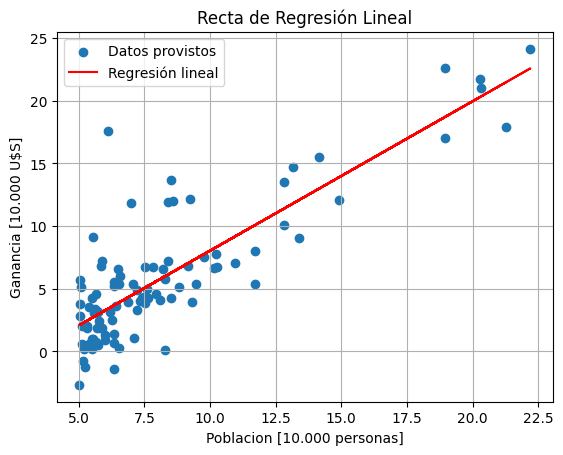

In [16]:
# a) y b)


# Con matrices
# [alfa , beta] = (X^T*X)^(-1) * X^T*Y
vec_pred = np.linalg.inv(data_x.T @ data_x) @ (data_x.T @ data_y)
b_pred = vec_pred[0]
w_pred = vec_pred[1]

Y_pred = b_pred + w_pred * data_x[:,1]

# Con funcion linregress()
b_pred1, w_pred1, r_value, p_value, std_err = linregress(data_x[:,1], data_y)
Y_pred1 = b_pred1 * data_x[:,1] + w_pred1

plt.scatter(data_x[:,1], data_y, label='Datos provistos')
plt.plot(data_x[:,1], Y_pred, color='red', label='Regresión lineal')
#plt.plot(data_x[:,1], Y_pred1, color='green', label='Regresion lineal')
plt.xlabel("Poblacion [10.000 personas]")
plt.ylabel("Ganancia [10.000 U$S]")
plt.grid()
plt.title("Recta de Regresión Lineal")
plt.legend()

# Calculo del ECM = E[(y_data - Y_pred)^2]
ECM = np.mean(np.power(data_y - Y_pred, 2))
print("ECM = ", ECM)

#del vec_pred, b_pred, w_pred, b_pred1, w_pred1, Y_pred, Y_pred1, r_value, p_value, ECM, std_err



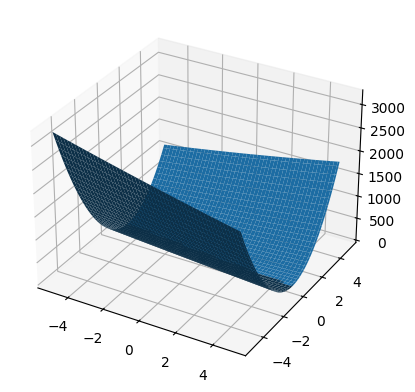

In [17]:
# c) 

# Riesgo empirico en 3D
definicion = 100

w_grid = np.linspace(-5, 5, definicion) 
b_grid = np.linspace(-5, 5, definicion)
aux = np.zeros((definicion, definicion))

W, B = np.meshgrid(w_grid, b_grid)

for i in range (definicion):
    for j in range (definicion):
        Y_pred2 = w_grid[i] * data_x[:,1] + b_grid[j]
        aux[i,j] = np.mean(np.power(data_y - Y_pred2, 2))

figure = plt.figure()
axis = figure.add_subplot(111, projection = '3d')
axis.plot_surface(W, B, aux)

#del definicion, w_grid, b_grid, aux, W, B, i, j, Y_pred2, figure, axis    

In [75]:
# d)

# Predecir ganancia para 35000 hab.
cant_hab = 35000
n = 10000

ganancia = w_pred * cant_hab/n + b_pred

print(f"La ganancia en una ciudad de {cant_hab} habitantes se estima en U$S {round(ganancia*n, 2)}",)

#del cant_hab, n, ganancia

La ganancia en una ciudad de 35000 habitantes se estima en U$S 2798.37


In [22]:
# d) Corregido
# Predecir ganancia para 35000 hab.
cant_hab = 3.5
n = 10000
ganancia = w_pred * cant_hab + b_pred

print(f"La ganancia en una ciudad de {round(cant_hab*n)} habitantes se estima en U$S {round(ganancia*n, 2)}",)

#del cant_hab, n, ganancia


La ganancia en una ciudad de 35000 habitantes se estima en U$S 2798.37


In [74]:
# e)

# Regresion lineal usando LinearRegression de sklearn

model = LinearRegression()
model.fit(data_x, data_y)

w_pred2_sklearn = model.coef_[1]
b_pred2_sklearn = model.intercept_
round_def = 15

print("Parametros estimados:")
print(f"w={round(w_pred, round_def)}, b={round(b_pred, round_def)}")
print("Parametros estimados con sklearn:")
print(f"w={round(w_pred2_sklearn, round_def)}, b={round(b_pred2_sklearn, round_def)}")

#del model, w_pred2_sklearn, b_pred2_sklearn, round_def


Parametros estimados:
w=1.193033644189599, b=-3.895780878311905
Parametros estimados con sklearn:
w=1.193033644189593, b=-3.895780878311854


# Ejercicio 5

![image.png](enunciados/ej5.png)

In [79]:
# Cargamos los datos del archivo en una variable

data = pd.read_csv('recursos/molinos.csv')

# Potencias de 45 Molinos, Velocidad, Direccion
# print(data.head())

#del data

In [78]:
# a) 

# Primero agarramos las columnas de las potencias
# y reemplazamos todos los valores negativos con un NaN
potencias = data.filter(like='P_', axis=1)
potencias = potencias.values
potencias[potencias < 0] = np.nan

# Inicio SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Reemplazo con la media
potencias_filtradas = imputer.fit_transform(potencias)


#del potencias, imputer, potencias_filtradas


In [77]:
# b) Velocidad del viento en coordenadas cartesianas

# Por descomposicion en funciones trigonometricas:
# vel_x = vel_modulo * sin(angulo_vel)
# vel_y = vel_modulo * cos(angulo_vel)

vel_modulo = data["Velocity"]
angulo_vel = data["Direction"]

vel_x = vel_modulo * np.sin(np.radians(angulo_vel))
vel_y = vel_modulo * np.cos(np.radians(angulo_vel))

vel_cartesiana = np.array([vel_x, vel_y]).T

#del vel_modulo, angulo_vel, vel_x, vel_y, vel_cartesiana


In [76]:
# c) 
# Regresor lineal. Input(eje_x): Potencias, output(eje_y): vel cartesiana

regresor_lineal = LinearRegression()
regresor_multioutput = MultiOutputRegressor(regresor_lineal)
regresor_multioutput.fit(potencias_filtradas, vel_cartesiana)

#del regresor_lineal, regresor_multioutput


In [75]:
# d ECM del entrenamiento

Y_pred3 = regresor_multioutput.predict(potencias_filtradas)

ECM = mean_squared_error(vel_cartesiana, Y_pred3)

print(f"El error cuadrático medio es {round(ECM, 3)}")

#del Y_pred3, ECM

El error cuadrático medio es 22.038


La funcion `mean_squared_error()` calcula el ECM para cada una de las coordenadas, pero devuelve un unico valor ya que luego calcula el promedio de los ECM de cada una de ellas.

Una forma de obtener cada ECM por separado es pasandole como argumento de la funcion `mean_squared_error()` los vectores de las velocidades X e Y, medidos y predecidos, por separado. Ej: `mean_squared_error(vel_cartesiana[:, 0], Y_pred3[:, 0])` para el ECM del eje x, y `mean_squared_error(vel_cartesiana[:, 1], Y_pred3[:, 1])` para el eje y.

Sino, otra forma de obtener el ECM de cada coordenada por separado seria utilizando un regresor lineal (unico output) para predecir cada una de las coordenadas X e Y, y luego calcular el ECM por separado.


In [74]:
ECM_X = mean_squared_error(vel_cartesiana[:, 0], Y_pred3[:, 0])
ECM_Y = mean_squared_error(vel_cartesiana[:, 1], Y_pred3[:, 1])

ECM_XY = (ECM_X + ECM_Y) /2
print(f"El error cuadrático medio de la coordenada X es {round(ECM_X, 3)}")
print(f"El error cuadrático medio de la coordenada Y es {round(ECM_Y, 3)}")
print(f"El error cuadrático medio, partiendo del ECM de cada coordenada es {round(ECM_XY, 3)}")

#del ECM_X, ECM_Y, ECM_XY

El error cuadrático medio de la coordenada X es 22.006
El error cuadrático medio de la coordenada Y es 22.07
El error cuadrático medio, partiendo del ECM de cada coordenada es 22.038


# Ejercicio 6

![image.png](enunciados/ej6.png)

In [17]:
# Cargamos los datos del archivo en una variable

data = pd.read_csv('recursos/inmobiliaria.csv')


print(data.head())

#del data

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


### a)
Cantidad de muestras: 20640
Cantidad de Features: 10
Lista de Features:
- Latitud - float
- Longitud - float 
- Promedio de edad en el terreno - int
- Cantidad de m2 construidos (tamaño de las casas en el terreno) - float
- Cantidad de m2 de habitaciones (tamaño de las hab de las casas del terreno) - float
- Cantidad de persionas que viven en esa division del terreno - entero
- Cantidad de casas en el terreno - entero
- Ingreso medio en las casas del terreno - float
- Valor medio de las casas del terreno - int
- Clasificacion segun proximidad a la costa - string



### b) Variables categoricas
Las variables categoricas son aquellas que representan datos que se pueden dividir en categorías o grupos basados en características específicas. Estas categorías suelen ser no numéricas y se utilizan para representar datos cualitativos. Hay tres tipos de variables categóricas:
- Variable nominal: No sigue ningún orden y los valores no presentan jerarquía.
- Variable ordinal: Los valores se pueden ordenar.
- Variable dicotómica (o variable binaria): Solo admite dos posibles valores.

En el caso de este dataset, solo la proximidad al oceano es categorica. El resto de las variables son numericas.



### c) `pairplot()`
La funcion `pairplot()` permite visualizar relaciones entre todas las combinaciones posibles de variables numéricas. En este caso lo vamos a utilizar para analizar si las variables numericas mencionadas anteriormente se encuentran correlacionadas.

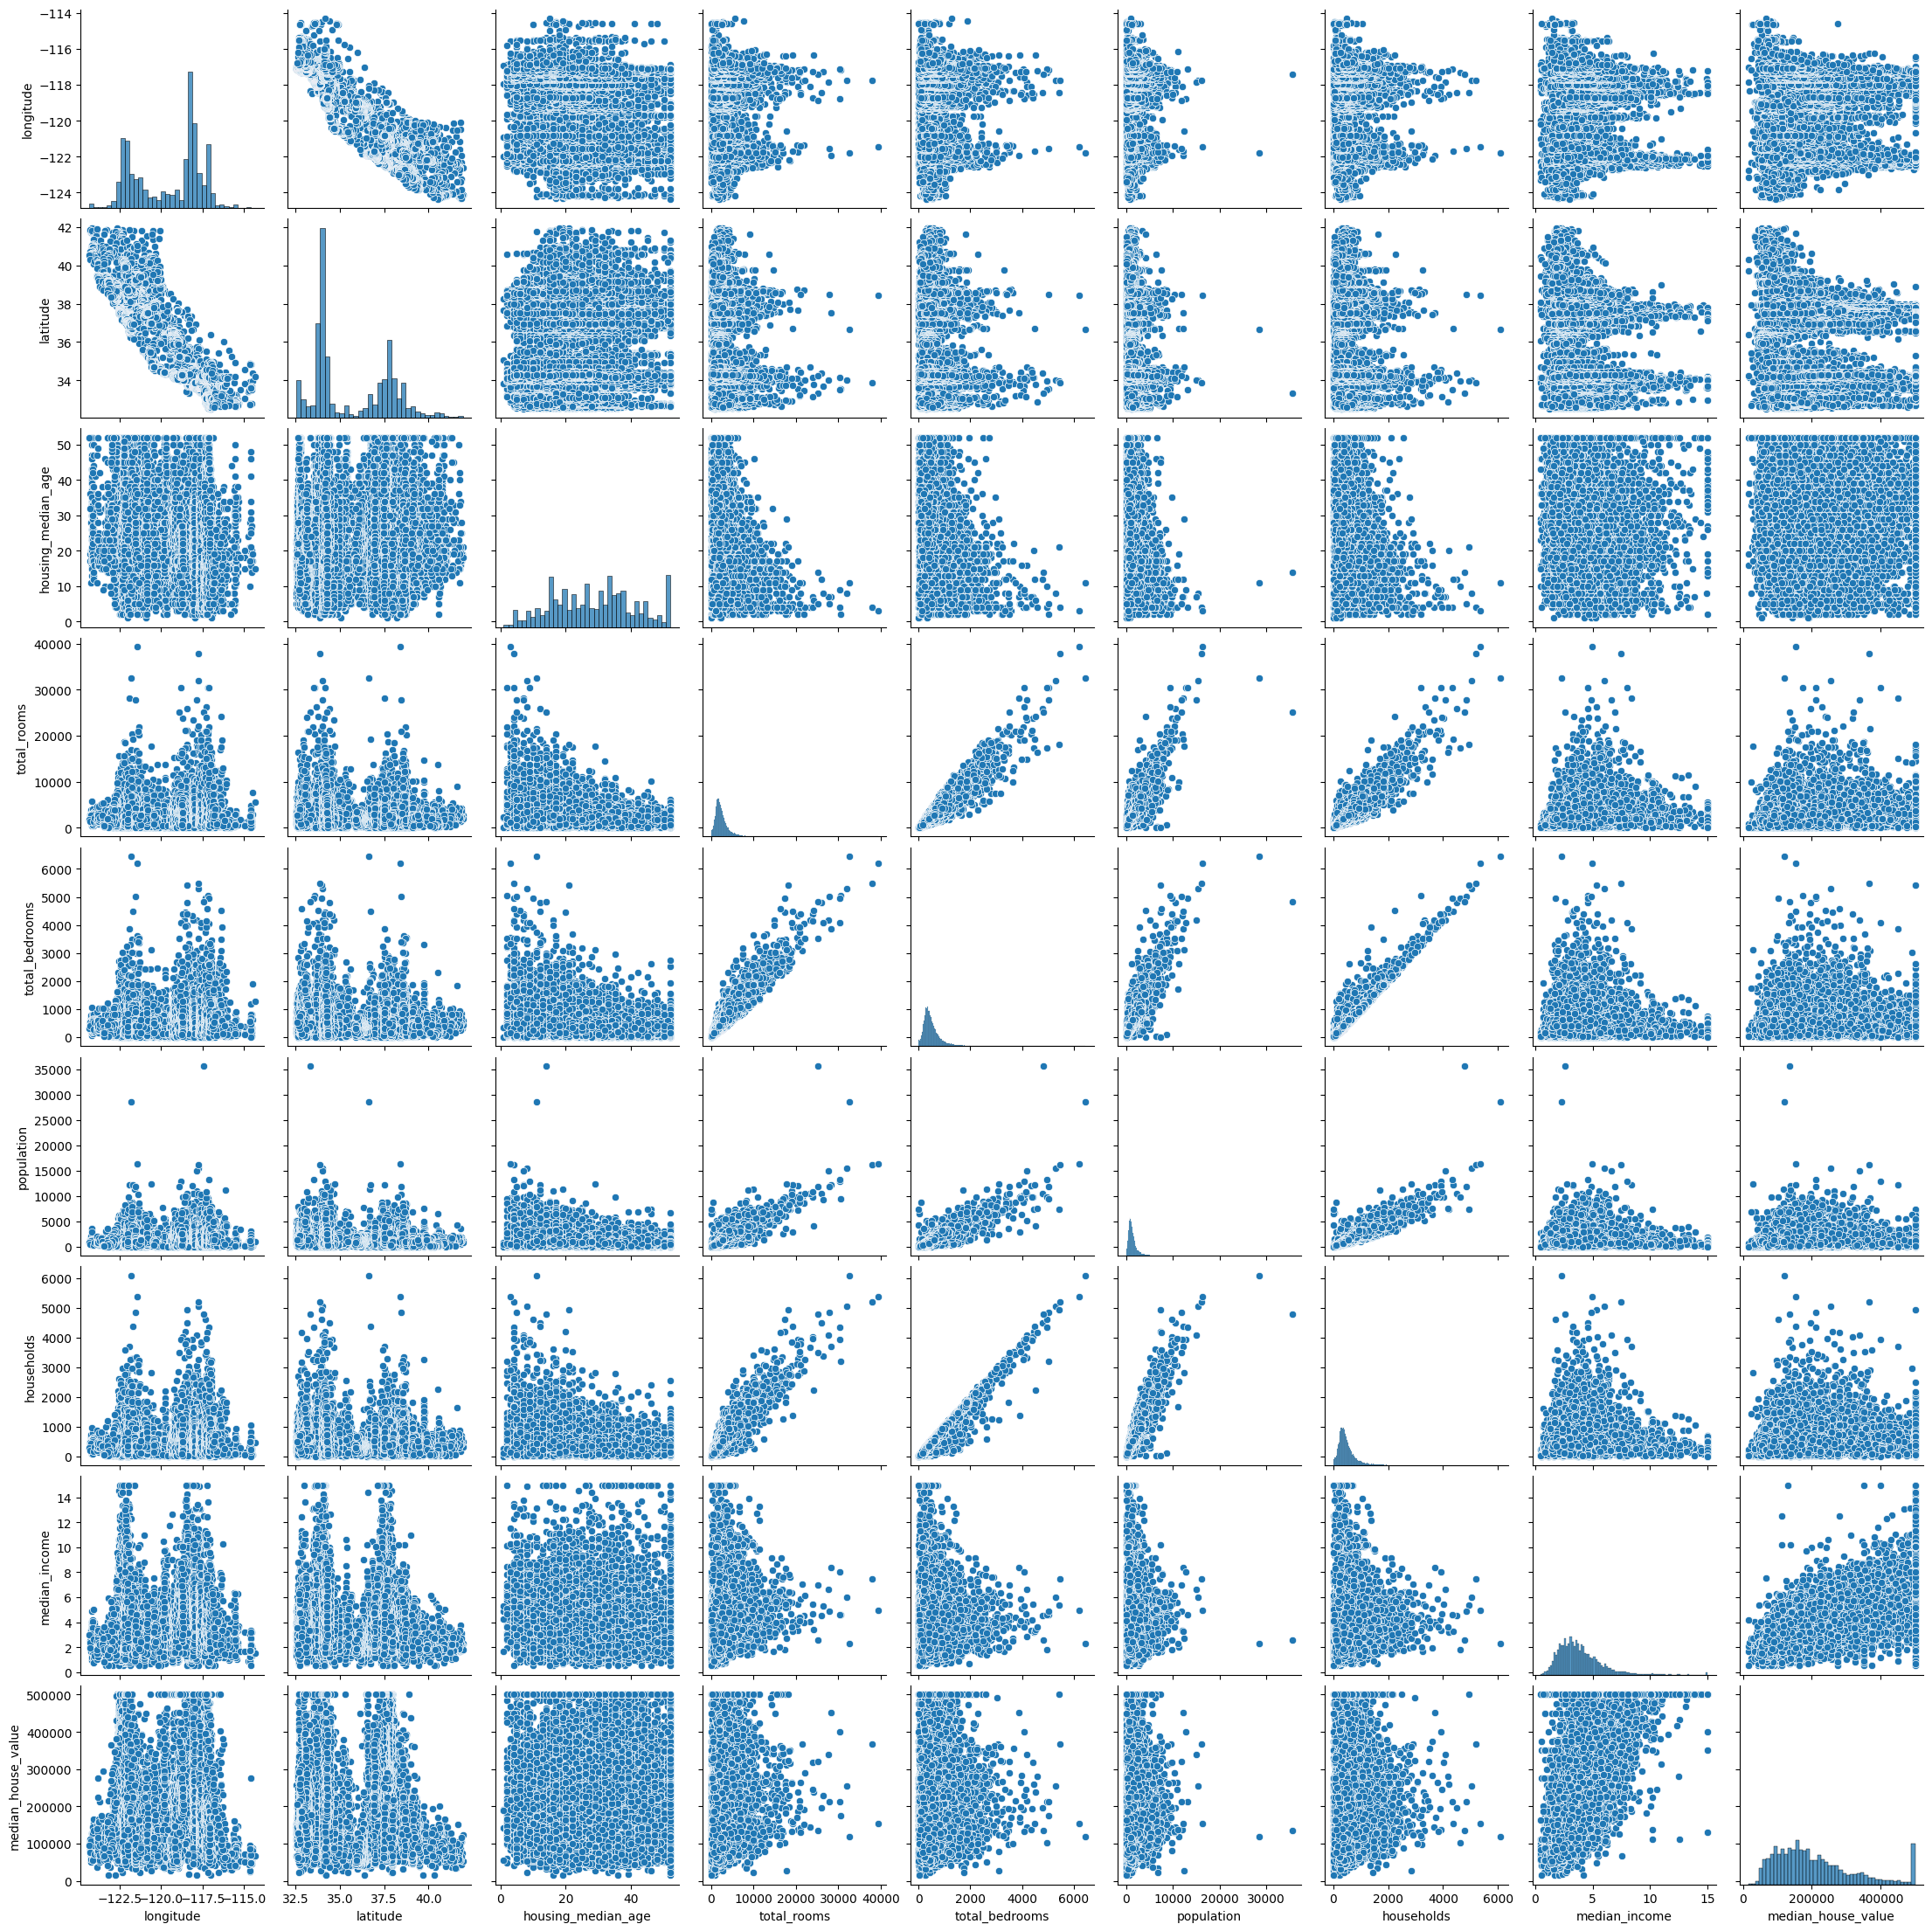

In [16]:
data_numericas = data.select_dtypes(include=['float64', 'int64'])
sns.pairplot(data_numericas)
plt.show()

#del data_numericas

Como se puede observar en el grafico de arriba. Existen una serie de features que se encuenttran altamente correlacionadas, Una de ellas es, por ejemplo, la cantidad de casas y la cantidad de habitaciones por parcela (lo cual tiene sentido porque mientras mas casas, mayor numero de habitaciones). Otro juego de features que se encuentran altamente correlacionadas es la cantidad de habitantes y la cantidad de casas. Todas estas features se encuentran correlacionadas de manera positiva, ya que se alinean en funcion de una recta con pendiente positiva. Esto indica que a medida que una feature aumenta en valor, tambien lo hace la otra.

Un detalle importante de este grafico es que en la diagonal (donde las variables a plotear son la misma), se realiza un histograma, que permite ver cuales son los valores que mas se repiten, asi como la distribucion de los mismos. Con esto podemos determinar si la misma se asemeja a una distribucion normal, si tienen varios picos, o si los datos se encuentran concentrados alrededor de un unico valor.

In [15]:
# d) Completar valores faltantes con los mas frecuentes

# Crear  SimpleImputer con la estrategia 'most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# Aplicar el imputer a todas las columnas del DataFrame
data_imputed = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

#del imputer, data_imputed

### e) One-hot encoding
One-Hot Encoding es una técnica utilizada para convertir variables categóricas en variables numéricas, de modo que puedan ser utilizadas en codigos de programacion. Se trata de convertir cada categoria en una columna binaria. Cada fila tendrá un valor de 1 en la columna que corresponde a la categoría de esa fila y 0 en las demás.

In [14]:
data_encoded = pd.get_dummies(data_imputed, columns=['ocean_proximity'])
#print(data_encoded)

#del data_encoded

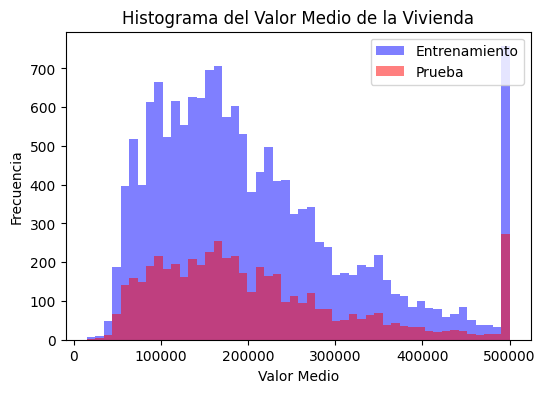

In [13]:
# f)

train_set, test_set = train_test_split(data_encoded, test_size=0.25)

# Graficar histogramas superpuestos de la mediana del valor de las propiedades
plt.figure(figsize=(6, 4))

# Histogramas de la columna 'Mediana_valor' en ambos conjuntos
plt.hist(train_set['median_house_value'], bins=50, alpha=0.5, label='Entrenamiento', color='blue')
plt.hist(test_set['median_house_value'], bins=50, alpha=0.5, label='Prueba', color='red')
plt.xlabel('Valor Medio')
plt.ylabel('Frecuencia')
plt.title('Histograma del Valor Medio de la Vivienda')
plt.legend()

#del train_set, test_set


In [12]:
# g) 

# Normalizar cada variable exceptuando a la mediana del valor de la propiedad.
scaler = StandardScaler()

# Uso .drop() para excluir la columna
x_train_set = train_set.drop(columns=['median_house_value'])
x_test_set = test_set.drop(columns=['median_house_value'])


y_train_set = train_set['median_house_value']
y_test_set = test_set['median_house_value']

scaler.fit(x_train_set)
x_train_set_norm = scaler.transform(x_train_set)
x_test_set_norm = scaler.transform(x_test_set)

#del scaler, x_train_set, x_test_set, y_train_set, y_test_set, x_train_set_norm, x_test_set_norm


In [11]:
# h) Regresión lineal para predecir la mediana del valor de la propiedad en función del resto de las variables.
# Indicar el ECM de entrenamiento y testeo.

model = LinearRegression()
model.fit(x_train_set_norm, y_train_set)

y_train_pred = model.predict(x_train_set_norm)
y_test_pred = model.predict(x_test_set_norm)

# Calculo los ECM

ECM_train = mean_squared_error(y_train_set, y_train_pred)
ECM_test = mean_squared_error(y_test_set, y_test_pred)

# Printeo

print(f"El ECM del conjunto usado para entrenamiento es {round(ECM_train, 4)}")
print(f"El ECM del conjunto usado para prueba es {round(ECM_test, 4)}")

#del model, y_train_pred, y_test_pred, ECM_train, ECM_test


El ECM del conjunto usado para entrenamiento es 4764377721.2269
El ECM del conjunto usado para prueba es 4631155586.866


# Ejercicio 7

![image.png](enunciados/ej7.png)

Partiendo del problema de regresion lineal, nuestro objetivo es minimizar el error cuadratico medio (ECM), cuya expresion matematica es

$J(w)= \frac{1}{n} \cdot  ||X \cdot w - y||^2$

Sin embargo, en el caso de la Regresion de Ridge, al ECM se le agrega un termino de regularizacion. Este mismo es utilizado para evitar el sobreajuste, y penaliza los coeficientes grandes. Con esto se obtiene la funcion de costo completa

$J(w)= \frac{1}{n} \cdot  (||X \cdot w - y||^2 + \lambda ||w||^2)$

Para encontrar los w que minimizan la funcion de costo derivamos la expresion, y mas abajo la igualamos a cero.

$\nabla J(w) = \nabla \frac{1}{n} \cdot  (||X \cdot w - y||^2 + \lambda ||w||^2)$

Por propiedad distributiva del gradiente

$\nabla J(w) = \nabla \frac{1}{n} \cdot  (||X \cdot w - y||^2) + \nabla \lambda ||w||^2$


El resultado del primer termino lo ~~obtenemos de la regularizacion L1~~ calculamos a continuacion, mientras que el resultado del segundo termino es $\frac{\partial ||w||^2}{\partial w} = 2w$

$\nabla J(w) = \nabla \frac{1}{n} \cdot  (||X \cdot w - y||^2) = \nabla \frac{1}{n} \cdot (X \cdot w - y)^T \cdot (X \cdot w - y)$

$\nabla J(w) = \nabla \frac{1}{n} \cdot [w^T X^T X w - 2w^T X^T y + y^Ty]$

$\nabla J(w) = \frac{2}{n} (X^T X w - X^T y) $

Finalmente planteamos:

$\nabla J(w) = \frac{2}{n} \cdot (X^TXw - X^Ty) + 2w = 0$

Esto solo se cumple si

$X^T X w - X^T y + 2w = 0$

Reordenando 

$(X^T X + \lambda I)w = X^Ty$

Luego despejando w obtenemos la solucion

$w =  (X^TX + \lambda I)^{-1} \cdot X^Ty$





Que el algoritmo este muy regularizado, implica que el valor de $\lambda$ es muy grande.

En este caso, la matriz $X^T X + \lambda I$ estara dominada por $\lambda I$

Despejando w, se obtiene

$w \approx \frac{1}{\lambda} X^T y $

Esta expresion permite notar que los coeficientes w tiendan a valores muy pequeños a medida que aumenta $\lambda$. En este caso, el modelo prioriza la reduccion del sobreajuste, haciendolo mas "suave".

# Ejercicio 8

![image.png](enunciados/ej8.png)

In [2]:
# Cargamos los datos del archivo en una variable

data = pd.read_csv('recursos/represa.csv')
# Cantidad de agua a partir de la variacion del nivel de agua.

print(data.head())

# Vemos que ya esta dividido en conjuntos de entrenamiento, validacion
# y testeo


#del data

      Xtrain     ytrain       Xval       yval      Xtest      ytest
0 -15.936758   2.134311 -16.746536   4.170202 -33.318004   3.316890
1 -29.152979   1.173257 -14.577471   4.067263 -37.912164   5.397690
2  36.189549  34.359109  34.515759  31.873068 -51.206938   0.130430
3  37.492187  36.837955 -47.010076  10.623656  -6.132596   6.192598
4 -48.058829   2.808965  36.975119  31.836021  21.261183  17.088487


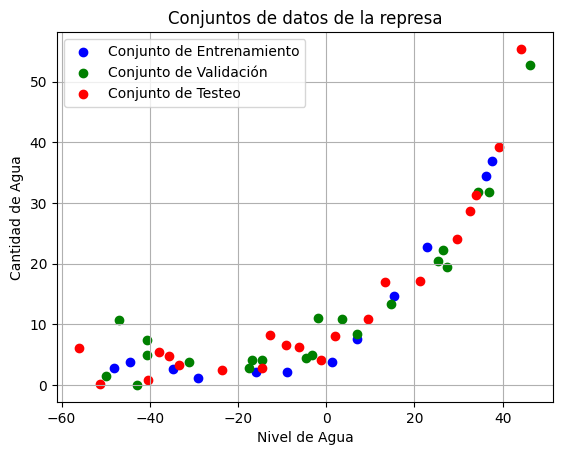

In [4]:
# a) Scatter plot de los 3 conjuntos

plt.scatter(data['Xtrain'], data['ytrain'], color='blue', label='Conjunto de Entrenamiento')
plt.scatter(data['Xval'], data['yval'], color='green', label='Conjunto de Validación')
plt.scatter(data['Xtest'], data['ytest'], color='red', label='Conjunto de Testeo')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.title('Conjuntos de datos de la represa')
plt.grid()
plt.legend()



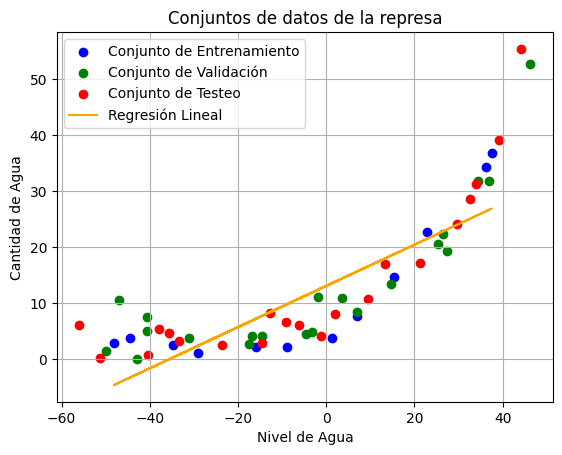

In [5]:
# b) Regresion lineal graficada sobre el scatter

model = LinearRegression()

#Extraigo los datos
Xtrain = data['Xtrain'].dropna().values.reshape(-1, 1)
ytrain = data['ytrain'].dropna().values.reshape(-1, 1)
Xval = data['Xval'].dropna().values.reshape(-1, 1)
yval = data['yval'].dropna().values.reshape(-1, 1)
Xtest = data['Xtest'].dropna().values.reshape(-1, 1)
ytest = data['ytest'].dropna().values.reshape(-1, 1)


model.fit(Xtrain, ytrain)
y_train_pred = model.predict(Xtrain)
y_val_pred = model.predict(Xval)
y_test_pred = model.predict(Xtest)

plt.scatter(data['Xtrain'], data['ytrain'], color='blue', label='Conjunto de Entrenamiento')
plt.scatter(data['Xval'], data['yval'], color='green', label='Conjunto de Validación')
plt.scatter(data['Xtest'], data['ytest'], color='red', label='Conjunto de Testeo')
plt.plot(Xtrain, y_train_pred, color='orange', label='Regresión Lineal')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.title('Conjuntos de datos de la represa')
plt.grid()
plt.legend()

#del model, Xtrain, ytrain, Xval, yval, Xtest, ytest, y_train_pred, y_val_pred, y_test_pred


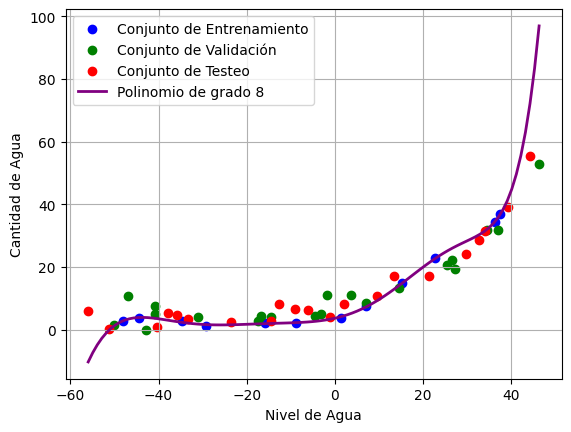

In [85]:
# c) Regresion polinomica de gr=8, sin regularizar. Grafico sobre el scatter

poly = PolynomialFeatures(degree=8)
poly.fit(Xtrain)

x_train_poly = poly.transform(Xtrain)
x_val_poly = poly.transform(Xval)
x_test_poly = poly.transform(Xtest)


x = np.linspace(np.min(np.concatenate((Xtrain, Xval, Xtest))), np.max(np.concatenate((Xtrain, Xval, Xtest))), 100).reshape(-1, 1)
x_poly = poly.transform(x)

scaler = StandardScaler()
scaler.fit(x_train_poly)
x_train_poly = scaler.transform(x_train_poly)
x_val_poly = scaler.transform(x_val_poly)
x_test_poly = scaler.transform(x_test_poly)
x_poly = scaler.transform(x_poly)

model = LinearRegression()
model.fit(x_train_poly, ytrain)


y_train_poly_pred = model.predict(x_train_poly)
y_val_poly_pred = model.predict(x_val_poly)
y_test_poly_pred = model.predict(x_test_poly)

y_poly_pred = model.predict(x_poly)



plt.scatter(data['Xtrain'], data['ytrain'], color='blue', label='Conjunto de Entrenamiento')
plt.scatter(data['Xval'], data['yval'], color='green', label='Conjunto de Validación')
plt.scatter(data['Xtest'], data['ytest'], color='red', label='Conjunto de Testeo')
plt.plot(x, y_poly_pred, color='purple', linewidth=2, label='Polinomio de grado 8')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.grid()
plt.legend()


#del poly, x_train_poly, x_val_poly, x_test_poly, x, x_poly, scaler, 
#del model, y_train_poly_pred, y_val_poly_pred, y_test_poly_pred, y_poly_pred




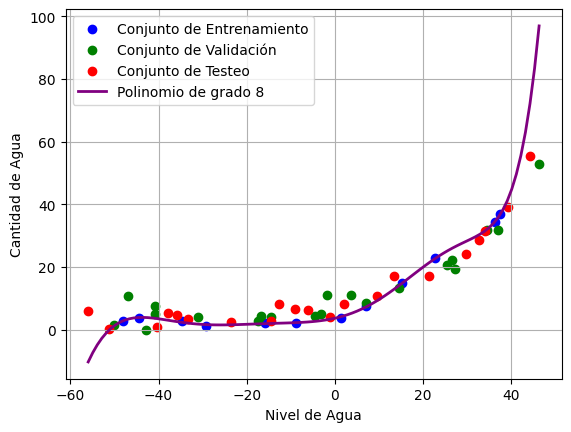

In [6]:
# c) Corregido

# Le agrego este parametro para que no agregue la columna de 1s
poly = PolynomialFeatures(degree=8, include_bias=False) 
poly.fit(Xtrain)

x_train_poly = poly.transform(Xtrain)
x_val_poly = poly.transform(Xval)
x_test_poly = poly.transform(Xtest)


x = np.linspace(np.min(np.concatenate((Xtrain, Xval, Xtest))), np.max(np.concatenate((Xtrain, Xval, Xtest))), 100).reshape(-1, 1)
x_poly = poly.transform(x)

scaler = StandardScaler()
scaler.fit(x_train_poly)
x_train_poly = scaler.transform(x_train_poly)
x_val_poly = scaler.transform(x_val_poly)
x_test_poly = scaler.transform(x_test_poly)
x_poly = scaler.transform(x_poly)

model = LinearRegression()
model.fit(x_train_poly, ytrain)


y_train_poly_pred = model.predict(x_train_poly)
y_val_poly_pred = model.predict(x_val_poly)
y_test_poly_pred = model.predict(x_test_poly)

y_poly_pred = model.predict(x_poly)



plt.scatter(data['Xtrain'], data['ytrain'], color='blue', label='Conjunto de Entrenamiento')
plt.scatter(data['Xval'], data['yval'], color='green', label='Conjunto de Validación')
plt.scatter(data['Xtest'], data['ytest'], color='red', label='Conjunto de Testeo')
plt.plot(x, y_poly_pred, color='purple', linewidth=2, label='Polinomio de grado 8')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.grid()
plt.legend()


#del poly, x_train_poly, x_val_poly, x_test_poly, x, x_poly, scaler, 
#del model, y_train_poly_pred, y_val_poly_pred, y_test_poly_pred, y_poly_pred







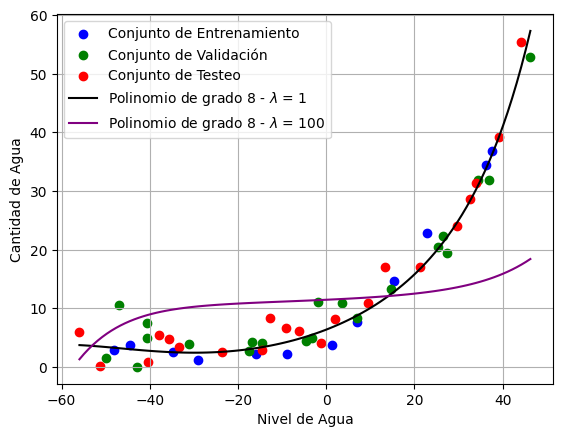

In [83]:
# d) Repetir regularizando con lambda=1, lambda=100 

# lambda = 1 
ridge_1 = Ridge(alpha = 1)
ridge_1.fit(x_train_poly, ytrain)

y_pred_ridge_1 = ridge_1.predict(x_poly)

plt.scatter(data['Xtrain'], data['ytrain'], color='blue', label='Conjunto de Entrenamiento')
plt.scatter(data['Xval'], data['yval'], color='green', label='Conjunto de Validación')
plt.scatter(data['Xtest'], data['ytest'], color='red', label='Conjunto de Testeo')
plt.plot(x, y_pred_ridge_1, color='black', label='Polinomio de grado 8 - $\lambda$ = 1')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.grid()
plt.legend()


# lambda = 100 
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(x_train_poly, ytrain)

y_pred_ridge_100 = ridge_100.predict(x_poly)


plt.plot(x, y_pred_ridge_100, color='purple', label='Polinomio de grado 8 - $\lambda$ = 100')
plt.xlabel('Nivel de Agua')
plt.ylabel('Cantidad de Agua')
plt.legend()

#del ridge_1, y_pred_ridge_1, ridge_100, y_pred_ridge_100


El Lambda que minimiza el ECM en el conjunto de validación: 3.2


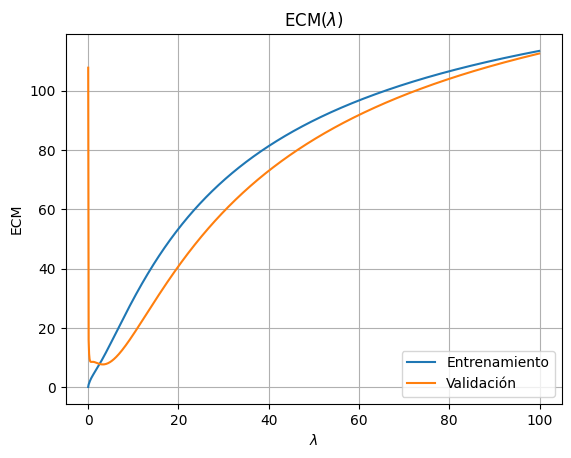

In [82]:
# e) Graficar ECM en funcion de lambda

ECM_train1 = []
ECM_val1 = []

val_lambda = np.arange(0, 100, 0.1)

for i in val_lambda:
    ridge = Ridge(alpha=i)
    ridge.fit(x_train_poly, ytrain)
    y_pred_train = ridge.predict(x_train_poly)
    ECM_train1.append(mean_squared_error(ytrain, y_pred_train)) 
    y_pred_val = ridge.predict(x_val_poly)
    ECM_val1.append(mean_squared_error(yval, y_pred_val))


plt.plot(val_lambda, ECM_train1, label='Entrenamiento')
plt.plot(val_lambda, ECM_val1, label='Validación')
#plt.xscale('log')  # Escala logarítmica para lambda
plt.xlabel('$\lambda$')
plt.ylabel('ECM')
plt.title('ECM($\lambda$)')
plt.grid()
plt.legend()

# ECM que minimiza el error de validacion

min_error_validacion = min(ECM_val1)
min_error_validacion_x = ECM_val1.index(min_error_validacion)
lambda_opt = val_lambda[min_error_validacion_x]

print(f"El Lambda que minimiza el ECM en el conjunto de validación: {round(lambda_opt, 2)}")


#del ECM_train1, ECM_val1, val_lambda, i, ridge, y_pred_train, y_pred_val, min_error_validacion, min_error_validacion_x, lambda_opt


In [81]:
# f) ECM testeo para el lambda anterior

ridge_2 = Ridge(alpha=lambda_opt)
ridge_2.fit(x_train_poly, ytrain)
y_pred_ridge_2 = ridge_2.predict(x_test_poly)
print(f"El ECM para el lambda óptimo es {round(mean_squared_error(ytest, y_pred_ridge_2), 2)}")

#del ridge_2, y_pred_ridge_2

El ECM para el lambda óptimo es 7.56
